# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
%matplotlib inline


In [2]:
dataset = get_dataset("data/train/*tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['data/train/*tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/train/*tfrecord']
INFO:tensorflow:Number of filenames to read: 86
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [3]:
def display_instances(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    # ADD CODE HERE
    color_map = {
        1 : "red",
        2 : "green",
        3 : "blue"
    }
    fix, ax = plt.subplots(1, figsize=(20,15))
    image = batch['image'].numpy()
    ax.imshow(image)
    w, h, _ = image.shape

    
    for i, box  in enumerate(batch['groundtruth_boxes']):
        x1 =  box[0] * w
        y1 =  box[1] * h
        x2 =  box[2] * w
        y2 =  box[3] * h
        color = color_map[batch['groundtruth_classes'].numpy()[i]]
        rec = Rectangle((y1, x1), y2-y1, x2-x1, facecolor='none', edgecolor=color, linewidth=2)
        ax.add_patch(rec)
        plt.savefig("results/step1/fig_"+str(i) + ".png")
    plt.show()


## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

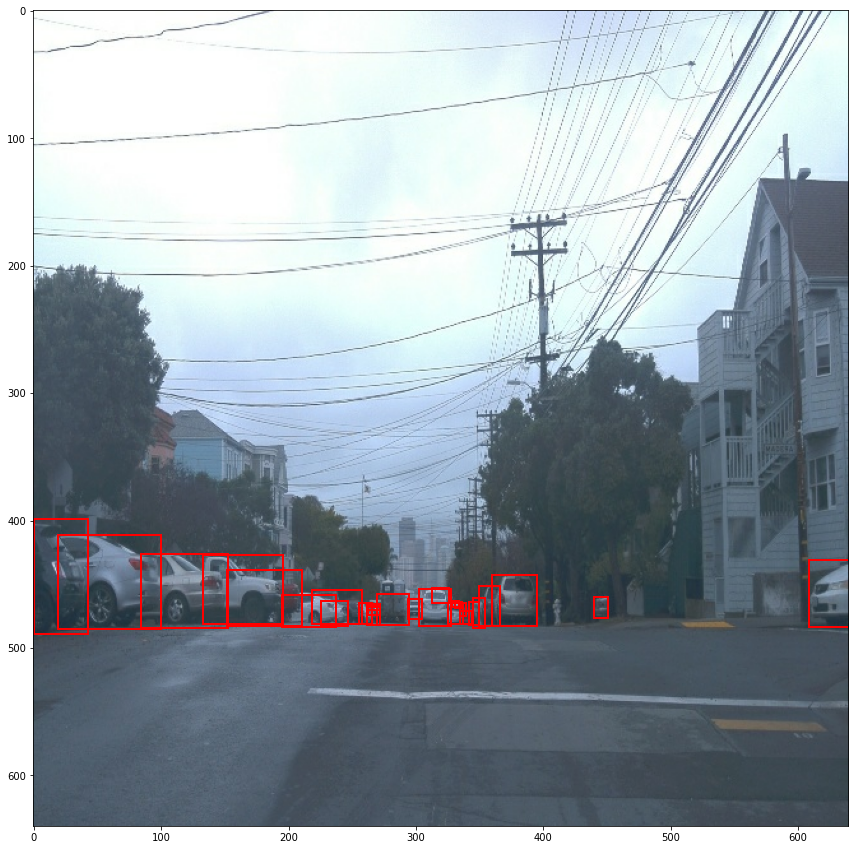

In [4]:
## STUDENT SOLUTION HERE
for batch in dataset.take(1):
    display_instances(batch)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [5]:
car_count = 0
pedestrian_count =0
cyclist_count = 0
total_imgs = 0
car_counter_list=[]
pedestrain_counter_list=[]
cyclist_counter_list=[]

for batch in dataset.take(1000):
    classes = batch['groundtruth_classes'].numpy()
    total_imgs += 1
    car_count = np.count_nonzero(classes==1)
    pedestrain_count = np.count_nonzero(classes==2)
    cyclist_count = np.count_nonzero(classes==4)
    car_counter_list.append(car_count)
    pedestrain_counter_list.append(pedestrain_count)
    cyclist_counter_list.append(cyclist_count)

    




total images:  10000
car per image:  17.2494
pedestrain per image:  17.2494
cyclist per image:  17.2494


In [46]:
print("total images: ", total_imgs)
print("car per image: ", np.mean(car_counter_list))
print("pedestrain per image: ", np.mean(pedestrain_counter_list))
print("cyclist per image: ", np.mean(cyclist_counter_list))

total images:  10000
car per image:  17.2494
pedestrain per image:  4.8304
cyclist per image:  0.1221


In [11]:
mean_car_per_img = np.mean(car_counter_list)
mean_pedestrain_per_img = np.mean(pedestrain_counter_list)
mean_cyclist_per_img = np.mean(cyclist_counter_list)

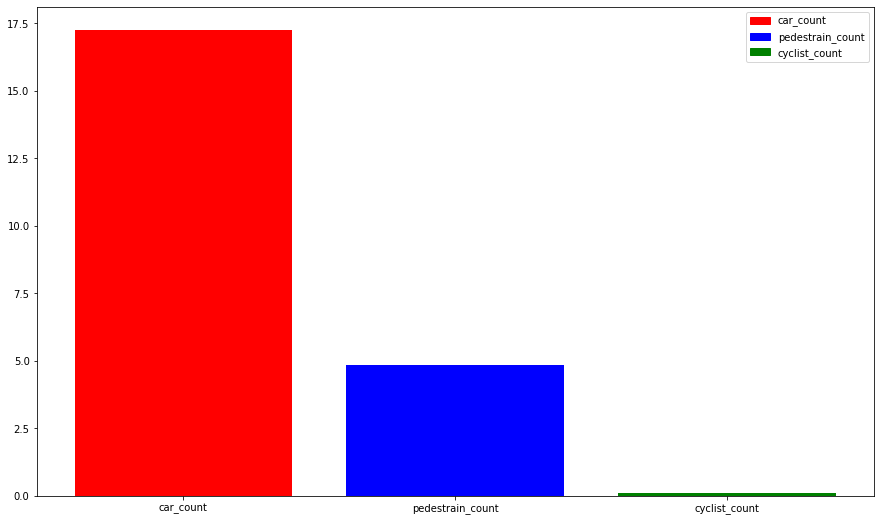

In [15]:
%matplotlib inline

fig, ax = plt.subplots(1,figsize=(15,9))
plt_color = ['red', 'blue','green']
colors = {'car_count':'red', 'pedestrain_count':'blue','cyclist_count': 'green'}
labels = list(colors.keys())
types= ['car_count', 'pedestrain_count', 'cyclist_count']
legends = [['car_count'], ['pedestrain_count'], ['cyclist_count']]

n_bins = 100
bar_data = np.array([mean_car_per_img, mean_pedestrain_per_img,mean_cyclist_per_img])
plt.bar(types, bar_data,color=plt_color)
handles =[plt.Rectangle((0,0), 1 ,1 , color = colors[label]) for label in labels]
plt.legend(handles,labels)
plt.savefig("results/object_count_per_img.png")
plt.show()

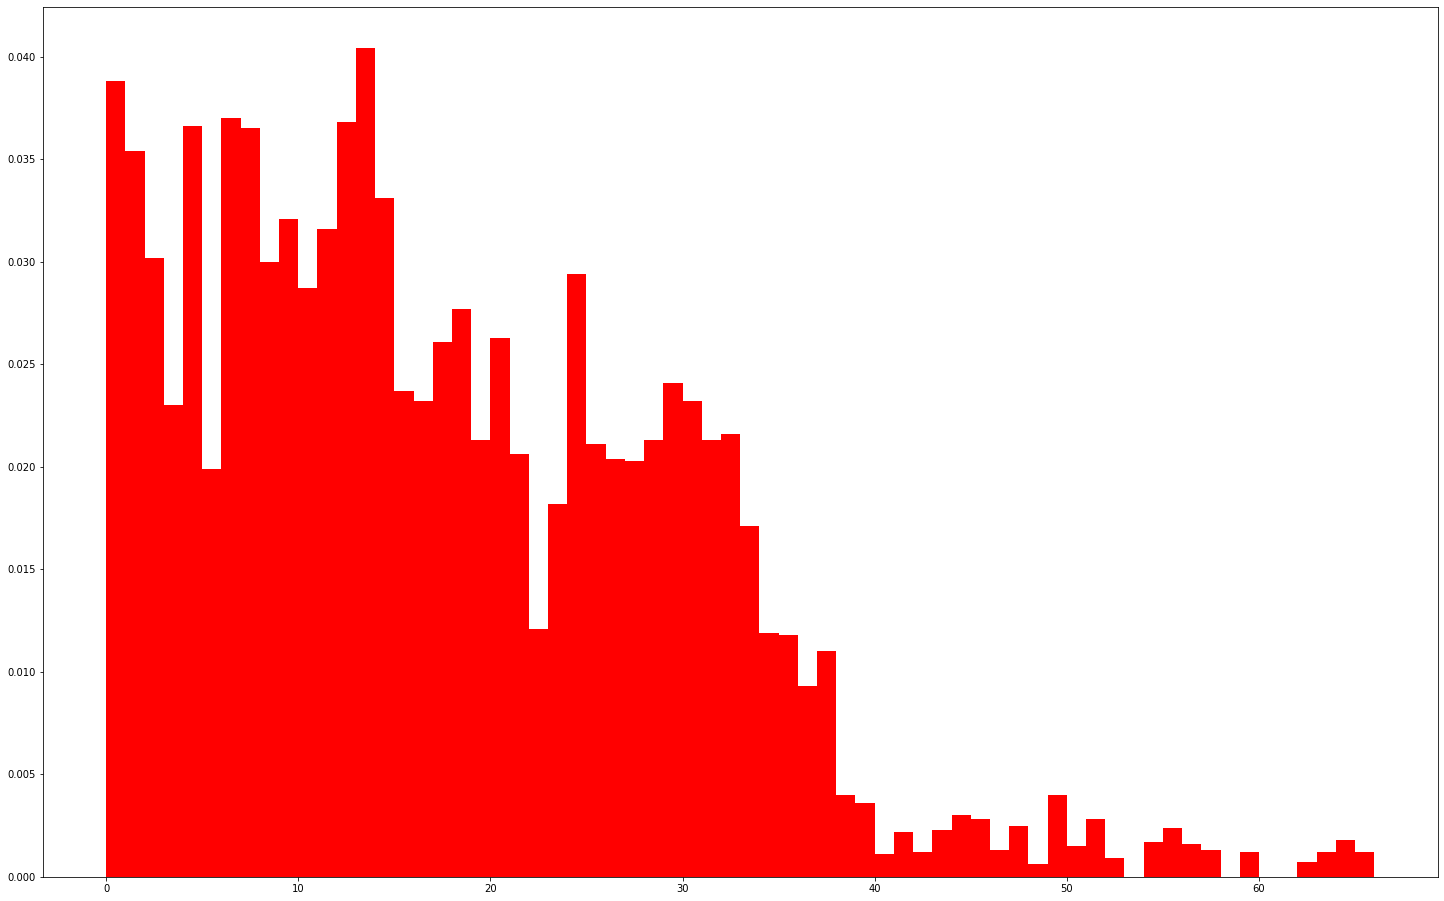

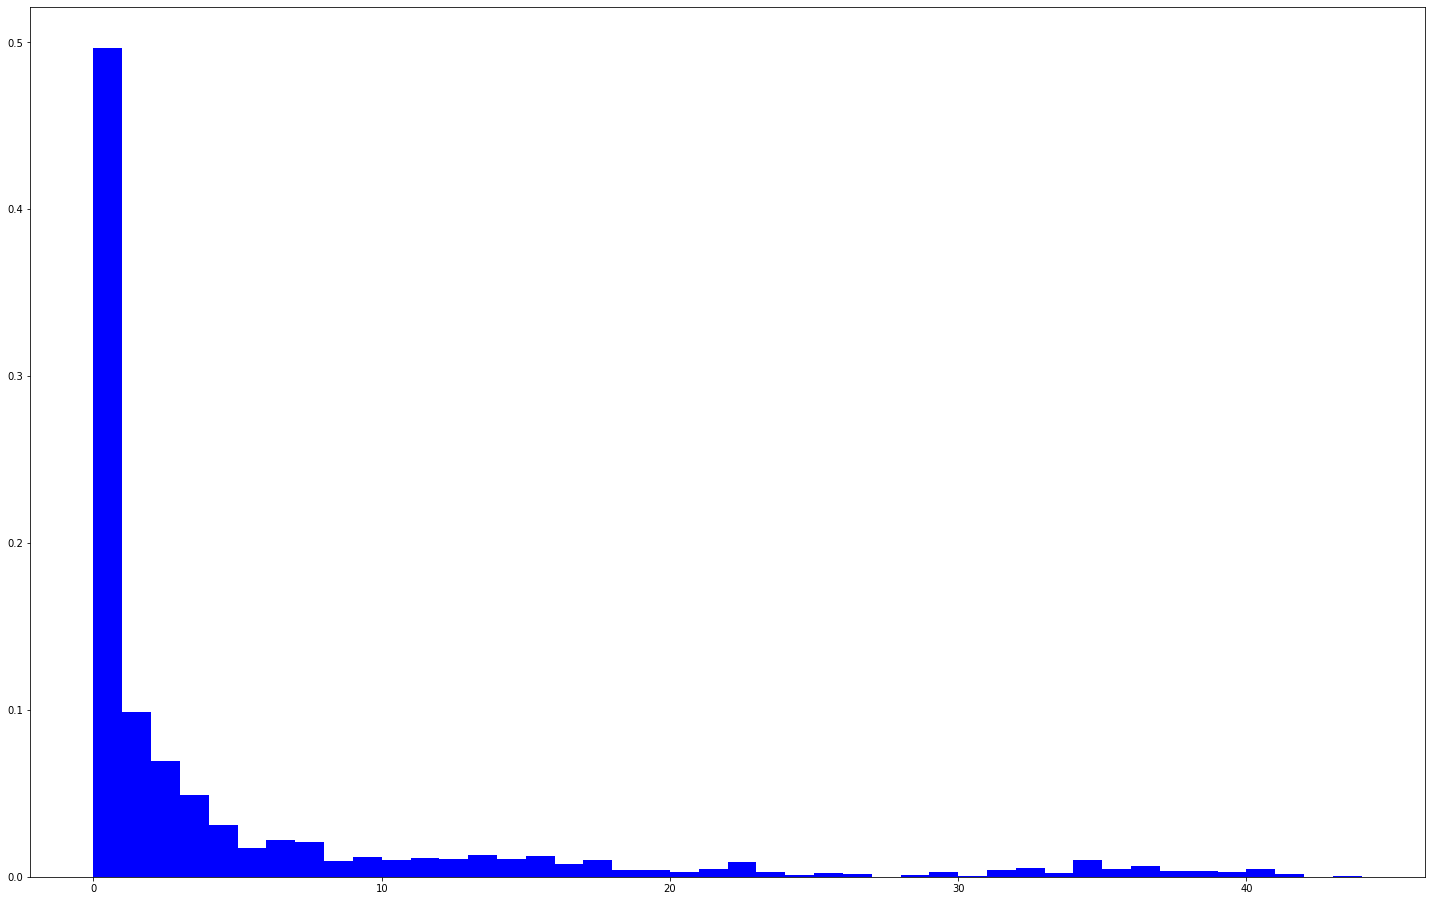

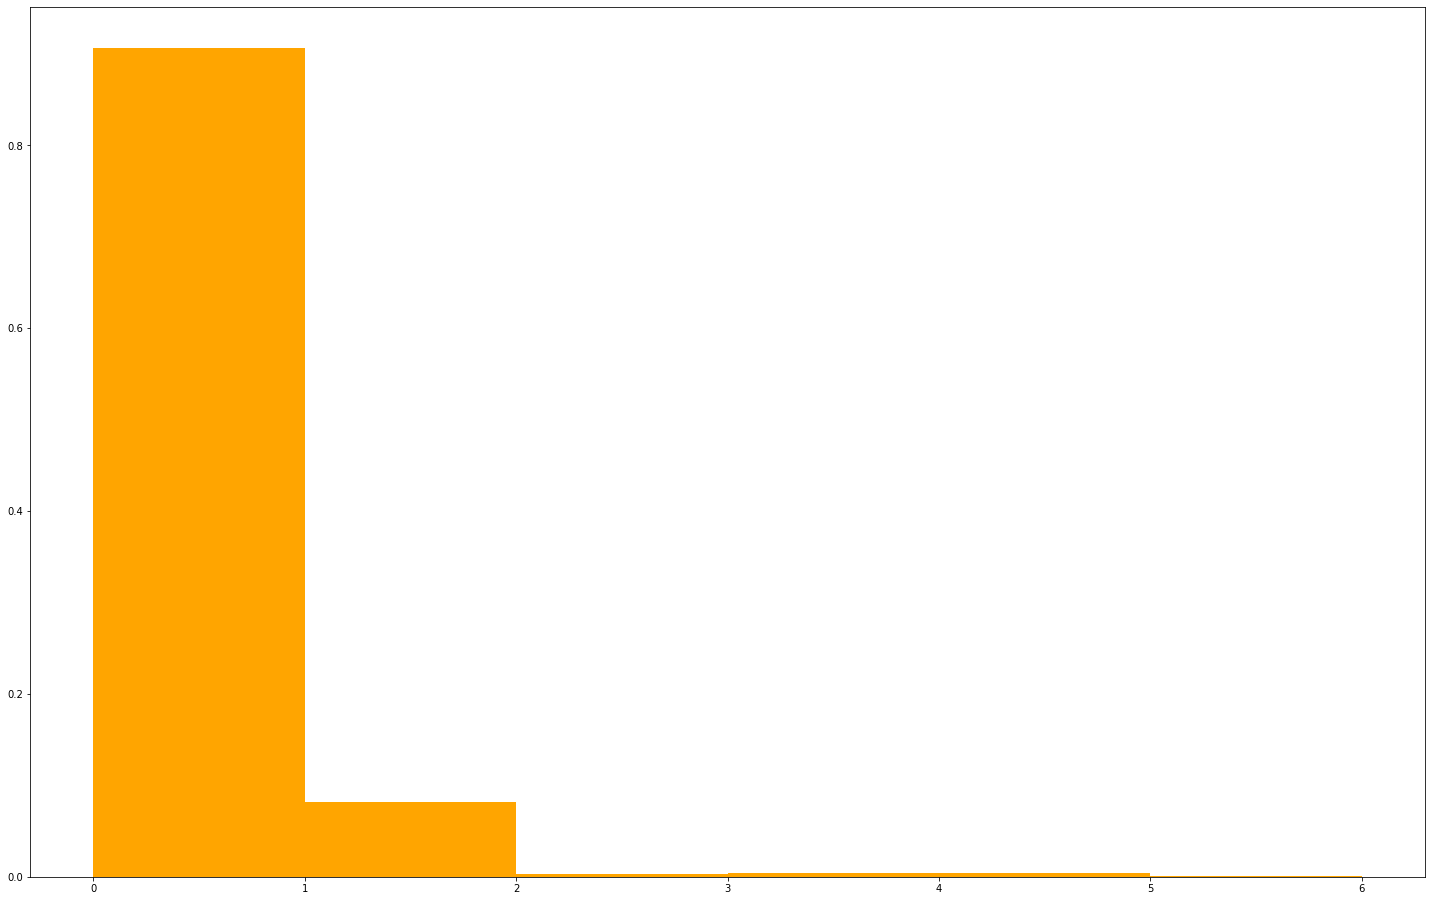

In [45]:
colors = ['red', 'blue', 'orange']
data = [car_counter_list, pedestrain_counter_list ,cyclist_counter_list]
types = ['car_counter_list', 'pedestrain_counter_list' ,'cyclist_counter_list']

for i in range(0,3):
    fig ,_= plt.subplots(1,figsize=(25,16))
    n_bins = max(data[i]) - min(data[i])
    plt.hist(data[i], n_bins, density= True, histtype='bar', color=colors[i])
    plt.savefig("results/"+types[i]+".png")
    plt.show()